In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import pylab

In [2]:
# Импорт данных
data_second = pd.read_csv(r'C:\Data_P\GitHub\data_second_january_2021.csv')

In [3]:
data_second

,price,rooms,lat,lng,square_total,square_living,square_kitchen,type_apartment,ceiling,renovation,...,heating_type,hot_water_type,cold_water_type,sewerage_type,gas_type,ventilation_type,firefighting_type,drainage_type,floor_flat,floor_house
0,7800000,1,55.684777,37.669360,36.20,18.9,6.6,Вторичка,2.64,Косметический,...,Центральное,Закрытая с приготовлением горячей воды на ЦТП,Центральное,Центральное,Центральное,Вытяжная вентиляция,Автоматическая,Внутренние водостоки,3.0,9.0
1,12700000,1,55.731642,37.565614,32.00,20.0,7.3,Вторичка,2.60,Евроремонт,...,Центральное,Открытая с отбором сетевой воды на горячее вод...,Центральное,Центральное,Центральное,Приточно-вытяжная вентиляция,Пожарные гидранты,Наружные водостоки,6.0,14.0
2,8495000,1,55.876496,37.490003,34.50,19.5,9.6,Вторичка,2.48,Косметический,...,Центральное,Закрытая с приготовлением горячей воды на ЦТП,Центральное,Центральное,Отсутствует,Приточно-вытяжная вентиляция,Пожарные гидранты,Внутренние водостоки,11.0,16.0
3,10500000,1,55.717452,37.749463,42.10,18.0,11.0,Вторичка,2.64,Дизайнерский,...,Центральное,Открытая с отбором сетевой воды на горячее вод...,Центральное,Центральное,Отсутствует,Приточно-вытяжная вентиляция,Автоматическая,Внутренние водостоки,11.0,23.0
4,8000000,1,55.876632,37.544782,34.60,19.9,9.4,Вторичка,2.64,Косметический,...,Центральное,Закрытая с приготовлением горячей воды на ЦТП,Центральное,Центральное,Центральное,Приточно-вытяжная вентиляция,Пожарные гидранты,Внутренние водостоки,9.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5309,74000000,6,55.661328,37.509343,439.97,184.0,10.0,Вторичка Пентхаус,2.90,Без ремонта,...,Центральное,Открытая с отбором сетевой воды на горячее вод...,Центральное,Центральное,Отсутствует,Приточно-вытяжная вентиляция,Автоматическая,Смешанные,40.0,40.0
5310,56000000,6,55.754274,37.603999,170.00,125.1,15.0,Вторичка,3.20,Без ремонта,...,Центральное,Квартирное (квартирный котел),Центральное,Центральное,Центральное,Приточно-вытяжная вентиляция,Пожарные гидранты,Наружные водостоки,1.0,5.0
5311,32000000,6,55.734359,37.661599,140.00,85.0,14.0,Вторичка,3.00,Косметический,...,Центральное,Закрытая с приготовлением горячей воды на ЦТП,Центральное,Центральное,Центральное,Приточно-вытяжная вентиляция,Пожарные гидранты,Наружные водостоки,7.0,7.0
5312,159000000,6,55.713040,37.500953,400.00,300.0,20.0,Вторичка,3.20,Евроремонт,...,Индивидуальный тепловой пункт (ИТП),Закрытая с приготовлением горячей воды на ИТП,Центральное,Центральное,Отсутствует,Вытяжная вентиляция,Автоматическая,Внутренние водостоки,1.0,3.0


In [4]:
# Перечень колонок в наборе данных
data_second.columns

Index(['price', 'rooms', 'lat', 'lng', 'square_total', 'square_living',
       'square_kitchen', 'type_apartment', 'ceiling', 'renovation', 'view',
       'type_house', 'floor_type', 'built_year', 'energy_efficiency',
       'playground', 'sportsground', 'foundation_type', 'electrical_type',
       'heating_type', 'hot_water_type', 'cold_water_type', 'sewerage_type',
       'gas_type', 'ventilation_type', 'firefighting_type', 'drainage_type',
       'floor_flat', 'floor_house'],
      dtype='object')

## Цены квартир

### 1) Распределение цены, логарифма цены, цены за квадратный метр и логарифма цены за квдаратный метр по всей выборке

In [5]:
# Вычисление логарифма цены, цены за квадратный метр и логарифма цены за квадратный метр
data_second['price_per_square'] = data_second['price'] / data_second['square_total']
data_second['log_price_per_square'] = float('nan')
data_second['log_price'] = float('nan')
for i in range(0, len(data_second)):
    data_second.loc[i, 'log_price_per_square'] =  math.log(data_second.loc[i, 'price_per_square'])
    data_second.loc[i, 'log_price'] =  math.log(data_second.loc[i, 'price'])

[Text(0.5, 0, 'Логарифм цены за кв. метр'), Text(0, 0.5, 'Частота')]

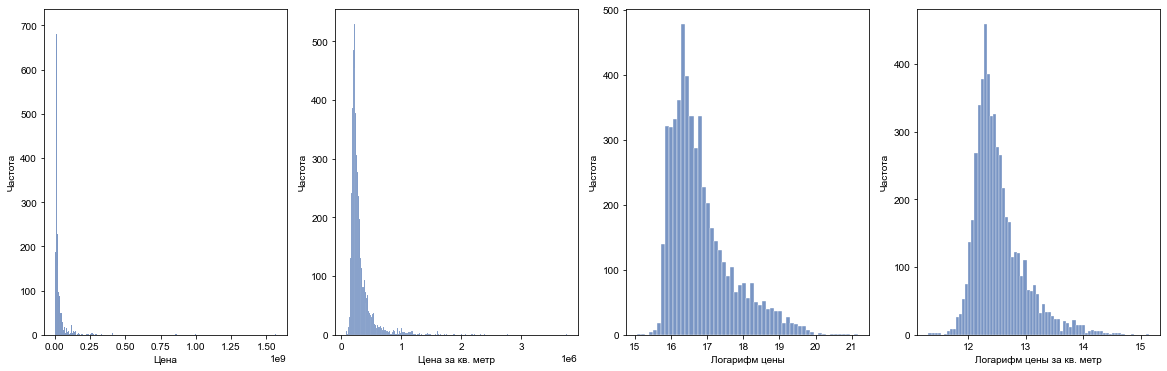

In [6]:
# Построение соответствующих гистограмм распределения
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(20,6))

x = pd.Series(data_second['price'])
sns.set(font_scale = 1)
sns.mpl.rc('figure', figsize = (20,10))
sns.histplot(x, ax = ax1).set(xlabel='Цена', ylabel='Частота')


x = pd.Series(data_second['price_per_square'])
sns.set(font_scale = 1)
sns.mpl.rc('figure', figsize = (20,10))
sns.histplot(x, ax = ax2).set(xlabel='Цена за кв. метр', ylabel='Частота')


x = pd.Series(data_second['log_price'])
sns.set(font_scale = 1)
sns.mpl.rc('figure', figsize = (20,10))
sns.histplot(x, ax = ax3).set(xlabel='Логарифм цены', ylabel='Частота')


x = pd.Series(data_second['log_price_per_square'])
sns.set(font_scale = 1)
sns.mpl.rc('figure', figsize = (20,10))
sns.histplot(x, ax = ax4).set(xlabel='Логарифм цены за кв. метр', ylabel='Частота')

### 2) Распределение логарифма цены в разрезе количества комнат

In [7]:
# Формируем отдельные списки 1,2,3,4,5,6 комнатных квартир
list_room_1 = []
list_room_2 = []
list_room_3 = []
list_room_4 = []
list_room_5 = []
list_room_6 = []
list_room_1_lat = []
list_room_2_lat = []
list_room_3_lat = []
list_room_4_lat = []
list_room_5_lat = []
list_room_6_lat = []
list_room_1_lng = []
list_room_2_lng = []
list_room_3_lng = []
list_room_4_lng = []
list_room_5_lng = []
list_room_6_lng = []

for i in range(0, len(data_second['price'])):
    if data_second.loc[i, 'rooms'] == 1:
        list_room_1.append(math.log(data_second.loc[i, 'price']))
        list_room_1_lat.append(data_second.loc[i, 'lat'])
        list_room_1_lng.append(data_second.loc[i, 'lng'])
    if data_second.loc[i, 'rooms'] == 2:
        list_room_2.append(math.log(data_second.loc[i, 'price']))
        list_room_2_lat.append(data_second.loc[i, 'lat'])
        list_room_2_lng.append(data_second.loc[i, 'lng'])
    if data_second.loc[i, 'rooms'] == 3:
        list_room_3.append(math.log(data_second.loc[i, 'price']))
        list_room_3_lat.append(data_second.loc[i, 'lat'])
        list_room_3_lng.append(data_second.loc[i, 'lng'])
    if data_second.loc[i, 'rooms'] == 4:
        list_room_4.append(math.log(data_second.loc[i, 'price']))
        list_room_4_lat.append(data_second.loc[i, 'lat'])
        list_room_4_lng.append(data_second.loc[i, 'lng'])
    if data_second.loc[i, 'rooms'] == 5:
        list_room_5.append(math.log(data_second.loc[i, 'price']))
        list_room_5_lat.append(data_second.loc[i, 'lat'])
        list_room_5_lng.append(data_second.loc[i, 'lng'])
    if data_second.loc[i, 'rooms'] == 6:
        list_room_6.append(math.log(data_second.loc[i, 'price']))
        list_room_6_lat.append(data_second.loc[i, 'lat'])
        list_room_6_lng.append(data_second.loc[i, 'lng'])

[Text(0.5, 0, 'Логарифм цены'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, '6-комнатные')]

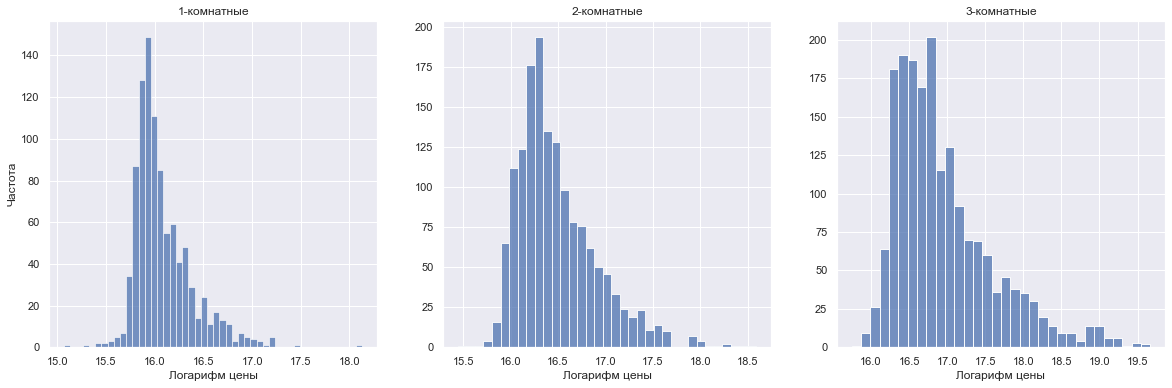

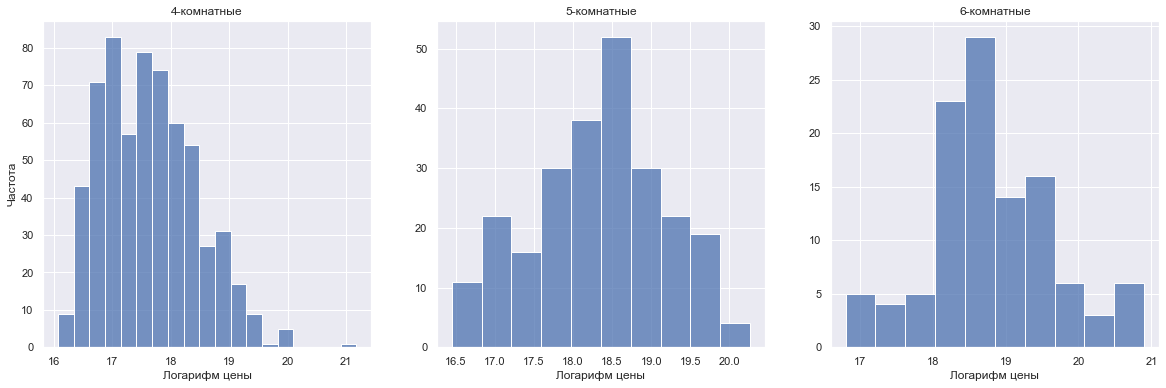

In [8]:
# Гистограммы распределения для 1, 2, 3 - комнатных квартир

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,6))

sns.set(font_scale = 1)
sns.mpl.rc('figure', figsize = (20,10))
sns.histplot(list_room_1, ax=ax1).set(xlabel='Логарифм цены', ylabel='Частота', title = '1-комнатные')

sns.set(font_scale = 1)
sns.mpl.rc('figure', figsize = (20,10))
sns.histplot(list_room_2, ax=ax2).set(xlabel='Логарифм цены', ylabel='', title = '2-комнатные')

sns.set(font_scale = 1)
sns.mpl.rc('figure', figsize = (20,10))
sns.histplot(list_room_3, ax=ax3).set(xlabel='Логарифм цены', ylabel='', title = '3-комнатные')

# Гистограммы распределения для 4, 5, 6 - комнатных квартир
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,6))

sns.set(font_scale = 1)
sns.mpl.rc('figure', figsize = (20,10))
sns.histplot(list_room_4, ax=ax1).set(xlabel='Логарифм цены', ylabel='Частота', title = '4-комнатные')

sns.set(font_scale = 1)
sns.mpl.rc('figure', figsize = (20,10))
sns.histplot(list_room_5, ax=ax2).set(xlabel='Логарифм цены', ylabel='', title = '5-комнатные')

sns.set(font_scale = 1)
sns.mpl.rc('figure', figsize = (20,10))
sns.histplot(list_room_6, ax=ax3).set(xlabel='Логарифм цены', ylabel='', title = '6-комнатные')

### 3) Boxplot логарифма цен в разрезе количества комнат

[Text(0, 0.5, ''), Text(0.5, 1.0, '6-комнатные')]

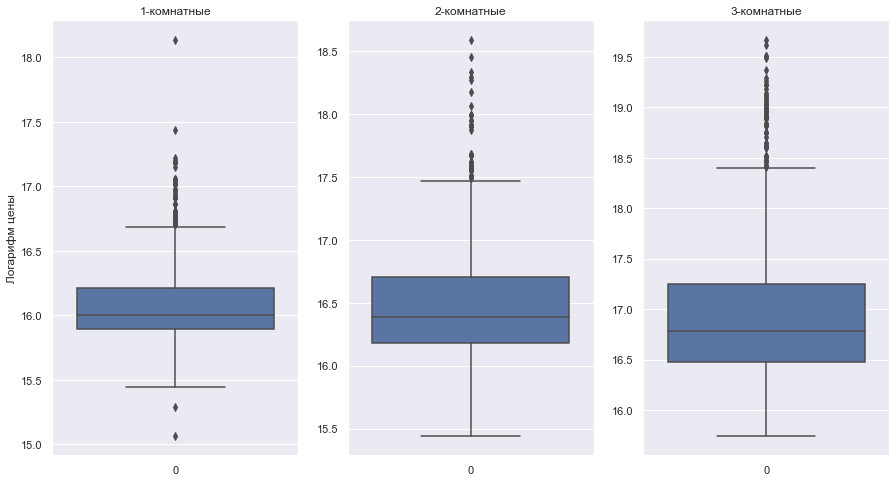

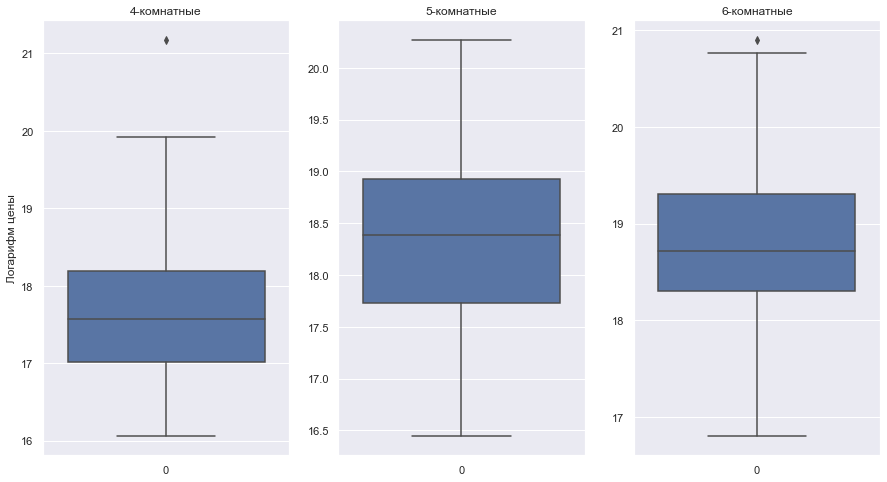

In [9]:
# Boxplot для 1, 2, 3 - комнатных квартир

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,8))

sns.set(font_scale = 1)
sns.mpl.rc('figure')
sns.boxplot(data=list_room_1, ax=ax1).set(ylabel='Логарифм цены',title = '1-комнатные')

sns.set(font_scale = 1)
sns.mpl.rc('figure')
sns.boxplot(data=list_room_2, ax=ax2).set(ylabel='', title = '2-комнатные')

sns.set(font_scale = 1)
sns.mpl.rc('figure')
sns.boxplot(data=list_room_3, ax=ax3).set(ylabel='', title = '3-комнатные')

# Boxplot для 4, 5, 6 - комнатных квартир

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,8))

sns.set(font_scale = 1)
sns.mpl.rc('figure')
sns.boxplot(data=list_room_4, ax=ax1).set(ylabel='Логарифм цены', title = '4-комнатные')

sns.set(font_scale = 1)
sns.mpl.rc('figure')
sns.boxplot(data=list_room_5, ax=ax2).set(ylabel='', title = '5-комнатные')

sns.set(font_scale = 1)
sns.mpl.rc('figure')
sns.boxplot(data=list_room_6, ax=ax3).set(ylabel='', title = '6-комнатные')

### 4) 3D - диаграммы логарифма цен и географических координат в разрезе количества комнат

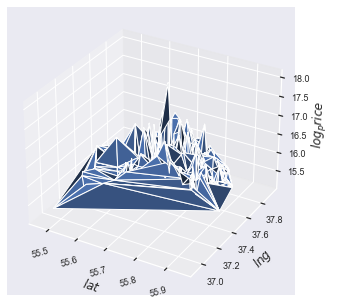

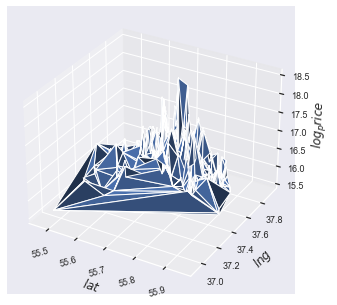

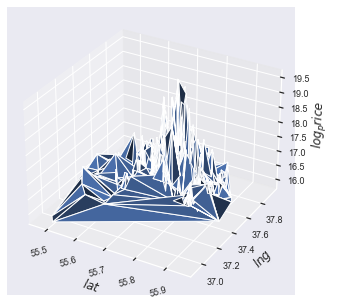

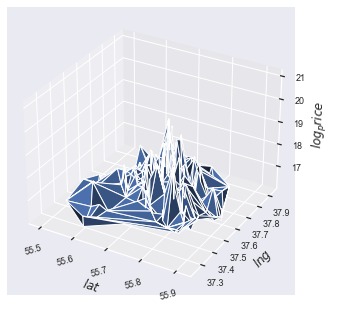

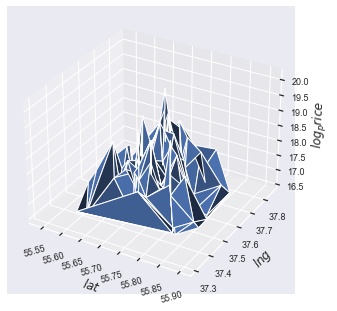

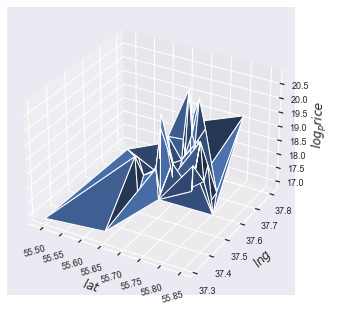

In [17]:
xline = list_room_1_lat
yline = list_room_1_lng
zline = list_room_1
fig = pylab.figure(figsize=(10,4))
axes = Axes3D(fig)
axes.tick_params(labelsize=9)
axes.tick_params(rotation=16, axis='x')
axes.set_ylabel('$lng$')
axes.set_xlabel('$lat$')
axes.set_zlabel('$log_price$')
axes.plot_trisurf(xline, yline, zline)

xline = list_room_2_lat
yline = list_room_2_lng
zline = list_room_2
fig = pylab.figure(figsize=(10,4))
axes = Axes3D(fig)
axes.tick_params(labelsize=9)
axes.tick_params(rotation=16, axis='x')
axes.set_ylabel('$lng$')
axes.set_xlabel('$lat$')
axes.set_zlabel('$log_price$')
axes.plot_trisurf(xline, yline, zline)

xline = list_room_3_lat
yline = list_room_3_lng
zline = list_room_3
fig = pylab.figure(figsize=(10,4))
axes = Axes3D(fig)
axes.tick_params(labelsize=9)
axes.tick_params(rotation=16, axis='x')
axes.set_ylabel('$lng$')
axes.set_xlabel('$lat$')
axes.set_zlabel('$log_price$')
axes.plot_trisurf(xline, yline, zline)

xline = list_room_4_lat
yline = list_room_4_lng
zline = list_room_4
fig = pylab.figure(figsize=(10,4))
axes = Axes3D(fig)
axes.tick_params(labelsize=9)
axes.tick_params(rotation=16, axis='x')
axes.set_ylabel('$lng$')
axes.set_xlabel('$lat$')
axes.set_zlabel('$log_price$')
axes.plot_trisurf(xline, yline, zline)

xline = list_room_5_lat
yline = list_room_5_lng
zline = list_room_5
fig = pylab.figure(figsize=(10,4))
axes = Axes3D(fig)
axes.tick_params(labelsize=9)
axes.tick_params(rotation=16, axis='x')
axes.set_ylabel('$lng$')
axes.set_xlabel('$lat$')
axes.set_zlabel('$log_price$')
axes.plot_trisurf(xline, yline, zline)

xline = list_room_6_lat
yline = list_room_6_lng
zline = list_room_6
fig = pylab.figure(figsize=(10,4))
axes = Axes3D(fig)
axes.tick_params(labelsize=9)
axes.tick_params(rotation=16, axis='x')
axes.set_ylabel('$lng$')
axes.set_xlabel('$lat$')
axes.set_zlabel('$log_price$')
axes.plot_trisurf(xline, yline, zline)